In [ ]:
"""
Purpose: Demonstrate how to do the metadata querying in datajoint
"""

In [1]:
%load_ext autoreload
%autoreload 2

# Installation requriements

In [13]:
#pip3 install datajoint networkx numpy pandas
#pip3 install bz2file

# Utility functions

In [14]:
import bz2
import pickle
from pathlib import Path

def decompress_pickle(filename):
    """
    Example: 
    data = decompress_pickle('example_cp.pbz2') 
    """
    if isinstance(filename, Path):
        filename = str(filename.absolute())
    if not filename.endswith(".pbz2"):
        filename += ".pbz2"
        
    with bz2.BZ2File(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Establishing Datajoint connection

In [3]:
"""
For this to work on your machine you need 
to set up the following configuration file

1. create the creditial file: ~/.aws/credentials
2. Add your aws_access_key_id and aws_secret_access_key id to the credentail file

[default]
aws_access_key_id = YOUR_ACCESS_KEY_ID
aws_secret_access_key = YOUR_SECRET_ACCESS_KEY

"""
import boto3
from botocore.exceptions import ClientError

def get_secret():

    secret_name = "rds!cluster-fbdb8fcc-f745-4361-b3ba-cf5f8349bc9a"
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        # For a list of exceptions thrown, see
        # https://docs.aws.amazon.com/secretsmanager/latest/apireference/API_GetSecretValue.html
        raise e

    secret = get_secret_value_response['SecretString']

    return eval(secret)

# secret_dict = get_secret()
# secret_dict

In [4]:
secret_dict = {'username': 'admin', 'password': 's.UN>KlUu|_:B*C9gUCcv$ZOL~q1'}

import datajoint as dj
dj.config['database.password'] = secret_dict['password']
dj.conn()

[2025-04-24 21:18:00,203][INFO]: Connecting admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306
[2025-04-24 21:18:00,751][INFO]: Connected admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306


DataJoint connection (connected) admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306

# Create a virtual module to the autoproofreading schema

In [5]:
h01 = dj.create_virtual_module('h01_process', 'h01_process')

# Downloading the whole segment metadata

In [6]:
import pandas as pd
def df_from_dj_table(table):
    return pd.DataFrame(table.fetch())

In [7]:
table = h01.AutoProofreadNeuron()
table

segment_id ID for segment in this materialization,decimation_ratio,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,multiplicity the total number of neurons that came from the parent segment id,cell_type_used,cell_type,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),centroid_x_nm nm x coordinate of soma,centroid_y_nm nm y coordinate of soma,centroid_z_nm nm z coordinate of soma,centroid_volume,max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),max_soma_area The largest surface area of the somas (area in um),syn_density_post_after_proof,syn_density_head_after_proof,syn_density_neck_after_proof,syn_density_shaft_after_proof,skeletal_length_processed_syn_after_proof,spine_density_after_proof,skeletal_length_processed_spine_after_proof,baylor_cell_type_after_proof,baylor_cell_type_exc_probability_after_proof,baylor_cell_type,baylor_cell_type_exc_probability,external_cell_type,cell_type_used_for_axon,cell_type_for_axon,external_cell_type_n_nuc,external_cell_type_fine,external_layer,axon_angle_max,axon_angle_min,n_axon_angles,axon_start_distance_from_soma,n_vertices number of vertices,n_faces number of faces,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,n_boutons,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,dendrite_skeletal_length,dendrite_area,dendrite_mesh_volume,dendrite_n_branches,axon_skeletal_length,axon_area,axon_mesh_volume,axon_n_branches,basal_skeletal_length,basal_area,basal_mesh_volume,basal_n_branches,apical_skeletal_length,apical_area,apical_mesh_volume,apical_n_branches,apical_tuft_skeletal_length,apical_tuft_area,apical_tuft_mesh_volume,apical_tuft_n_branches,apical_shaft_skeletal_length,apical_shaft_area,apical_shaft_mesh_volume,apical_shaft_n_branches,oblique_skeletal_length,oblique_area,oblique_mesh_volume,oblique_n_branches,apical_total_skeletal_length,apical_total_area,apical_total_mesh_volume,apical_total_n_branches,n_syn_valid,n_syn_valid_pre,n_syn_valid_post,n_syn_error,n_syn_error_pre,n_syn_error_post,n_syn_presyns_on_dendrite,n_syn_mesh_errored,n_syn_distance_errored,n_syn_no_label,n_syn_head,n_syn_neck,n_syn_shaft,n_syn_no_head,n_syn_bouton,n_syn_non_bouton,n_syn_dendrite,n_syn_axon,n_syn_basal,n_syn_apical,n_syn_apical_tuft,n_syn_apical_shaft,n_syn_oblique,n_syn_soma,n_syn_apical_total,n_syn_dendrite_head_postsyn,n_syn_dendrite_neck_postsyn,n_syn_dendrite_shaft_postsyn,n_syn_dendrite_no_head_postsyn,n_syn_axon_bouton_presyn,n_syn_axon_bouton_postsyn,n_syn_axon_non_bouton_presyn,n_syn_axon_non_bouton_postsyn,n_s

In [8]:
auto_df = df_from_dj_table(table)
auto_df

,segment_id,decimation_ratio,split_index,multiplicity,cell_type_used,cell_type,nucleus_id,nuclei_distance,n_nuclei_in_radius,n_nuclei_in_bbox,...,dendrite_bbox_x_min_soma_relative,dendrite_bbox_y_min_soma_relative,dendrite_bbox_z_min_soma_relative,dendrite_bbox_x_max_soma_relative,dendrite_bbox_y_max_soma_relative,dendrite_bbox_z_max_soma_relative,dendrite_n_limbs,dendrite_soma_angle_max,dendrite_soma_angle_min,run_time
0,1856283781,0.18,0,1,baylor,excitatory,14306,4220.25,1,1,...,-265403.294096,-1.333770e+05,-70244.105561,236544.197075,2.497312e+05,103945.047003,8,134.23,1.32,6275.14
1,2672114859,0.18,0,1,baylor,excitatory,15297,2348.76,1,1,...,-285229.671780,-6.070476e+05,-160823.588021,251899.363229,1.129716e+06,11837.613554,8,116.06,30.16,2384.78
2,3708640312,0.18,0,1,baylor,inhibitory,24033,503.17,1,1,...,-49963.456000,-1.043935e+05,-29226.451893,39810.817244,8.441529e+04,22081.807429,5,98.56,12.55,330.08
3,3748267179,0.18,0,1,baylor,excitatory,248,4507.59,1,1,...,-190574.474795,-6.966792e+05,-41960.041930,145818.044366,1.187412e+05,132283.508750,4,134.38,14.86,1111.22
4,3905170220,0.18,0,1,baylor,excitatory,2586,3673.12,1,1,...,-20016.955974,-9.239233e+03,-7349.976308,21686.025369,1.614573e+04,15856.813181,7,157.41,26.49,624.25
5,4315516403,0.18,0,1,baylor,excitatory,6032,8451.53,1,1,...,-108731.969808,-2.125620e+05,-159051.475178,255224.751907,4.576331e+05,14150.865701,6,123.22,40.90,1472.26
6,4344673594,0.18,0,1,baylor,excitatory,13062,2618.48,1,1,...,-74642.245157,-8.950006e+04,-5612.439928,162312.906956,0.000000e+00,94044.263558,1,29.01,29.01,77.93
7,4344761442,0.18,0,1,baylor,excitatory,6778,5275.80,1,1,...,-363625.665111,-1.036665e+06,-113060.788574,304372.956274,3.639311e+05,60712.928951,8,157.99,44.87,3089.17
8,4357625701,0.18,0,1,baylor,excitatory,1920,2740.13,1,1,...,-213139.507439,-3.453948e+05,-114755.309097,243024.140140,1.766885e+05,59105.837435,7,155.66,4.33,770.14
9,4370328113,0.18,0,1,baylor,excitatory,2145,1742.52,1,1,...,-148137.735153,-3.773762e+05,-66451.269193,176489.065123,1.838550e+05,105717.815313,5,150.72,13.49,694.00


# Downloading the branch-level metadata

### Setting up datajoint externals

In [36]:
import os
os.environ['DJ_SUPPORT_ADAPTED_TYPES'] = "TRUE"  
os.environ['DJ_SUPPORT_FILEPATH_MANAGEMENT'] = "TRUE"
BUCKET = "neurd-datalake"
RAW_MESH_LOC = "h01_raw_meshes"
ACCESS_KEY = os.environ['AWS_ACCESS_KEY']
SECRET_KEY = os.environ['AWS_SECRET_KEY']
STAGE = os.path.abspath('./stage')

dj.config['stores'] = {
'graph': dict(  # s3 storage for graph
                secure = True,
                stage = STAGE,
                protocol='s3',
                endpoint='s3.amazonaws.com',
                bucket = BUCKET,
                location = 'h01_graph',
                access_key=ACCESS_KEY,
                secret_key=SECRET_KEY),

}

from pathlib import Path
def validate_filepath(filepath):
    filepath = Path(filepath)
    assert filepath.exists()
    return filepath
    
class Adapter(dj.AttributeAdapter):
    attribute_type = ''

    def __init__(self, attribute_type):
        self.attribute_type = attribute_type
        super().__init__()

class FilePathAdapter(Adapter):    
    def put(self, filepath):
        return validate_filepath(filepath)

    def get(self, filepath):
        return validate_filepath(filepath)

graph = FilePathAdapter("filepath@graph")

schema = dj.Schema('h01_process')

@schema
class AutoProofreadNeuron(dj.Computed):
    definition='''
    -> h01.DecompositionCellType
    ---
    '''
    class Obj(dj.Part):
        definition="""
        ->master
        ---
        neuron_graph=NULL: <graph> #the graph for the 
        red_blue_suggestions=NULL: longblob
        """

### fetching networkx graph object

In [32]:
import networkx as nx
import numpy as np

def add_bounding_boxes_to_graph(graph,verbose = False):
    """
    Adds bounding box attributes (x, y, z) to each node with 'skeleton_data'.
    
    Parameters:
        graph (nx.Graph): A NetworkX graph with nodes containing 'skeleton_data' (Nx3 NumPy arrays).
    
    Returns:
        None (modifies the graph in place).
    """
    for node, data in graph.nodes(data=True):
        skeleton = data.get('skeleton_data')
        if skeleton is not None and isinstance(skeleton, np.ndarray) and skeleton.shape[1] == 3:
            min_coords = skeleton.min(axis=0)
            max_coords = skeleton.max(axis=0)
            graph.nodes[node]['bounding_box'] = np.vstack([min_coords,max_coords])
        else:
            if verbose:
                print(f"Skipping node {node}: 'skeleton_data' missing or not a valid Nx3 array")

def networkx_graph_from_segment_id(segment_id,split_index = 0,add_bounding_box = True):
    restr_table = (AutoProofreadNeuron.Obj & dict(segment_id=segment_id,split_index = split_index))
    G_file = restr_table.fetch1('neuron_graph')
    G = decompress_pickle(G_file)
    if add_bounding_box:
        add_bounding_boxes_to_graph(G)
    return G
    

In [33]:
segment_id = 3748267179
G = networkx_graph_from_segment_id(segment_id)
G

### Looking at node level attributes

In [34]:
G.nodes["L0_0"]['bounding_box']

array([[2282747.986741  , -863027.86837468,   40050.71435087],
       [2291005.08764787, -832711.54323316,   47502.8       ]])

### Optional: For visualizing the networks

In [35]:
try:
    from neuron_morphology_tools import neuron_nx_utils as nxu
except:
    raise Exception("install neuron_morphology_tools: \npip3 install git+https://github.com/reimerlab/neuron_morphology_tools.git")

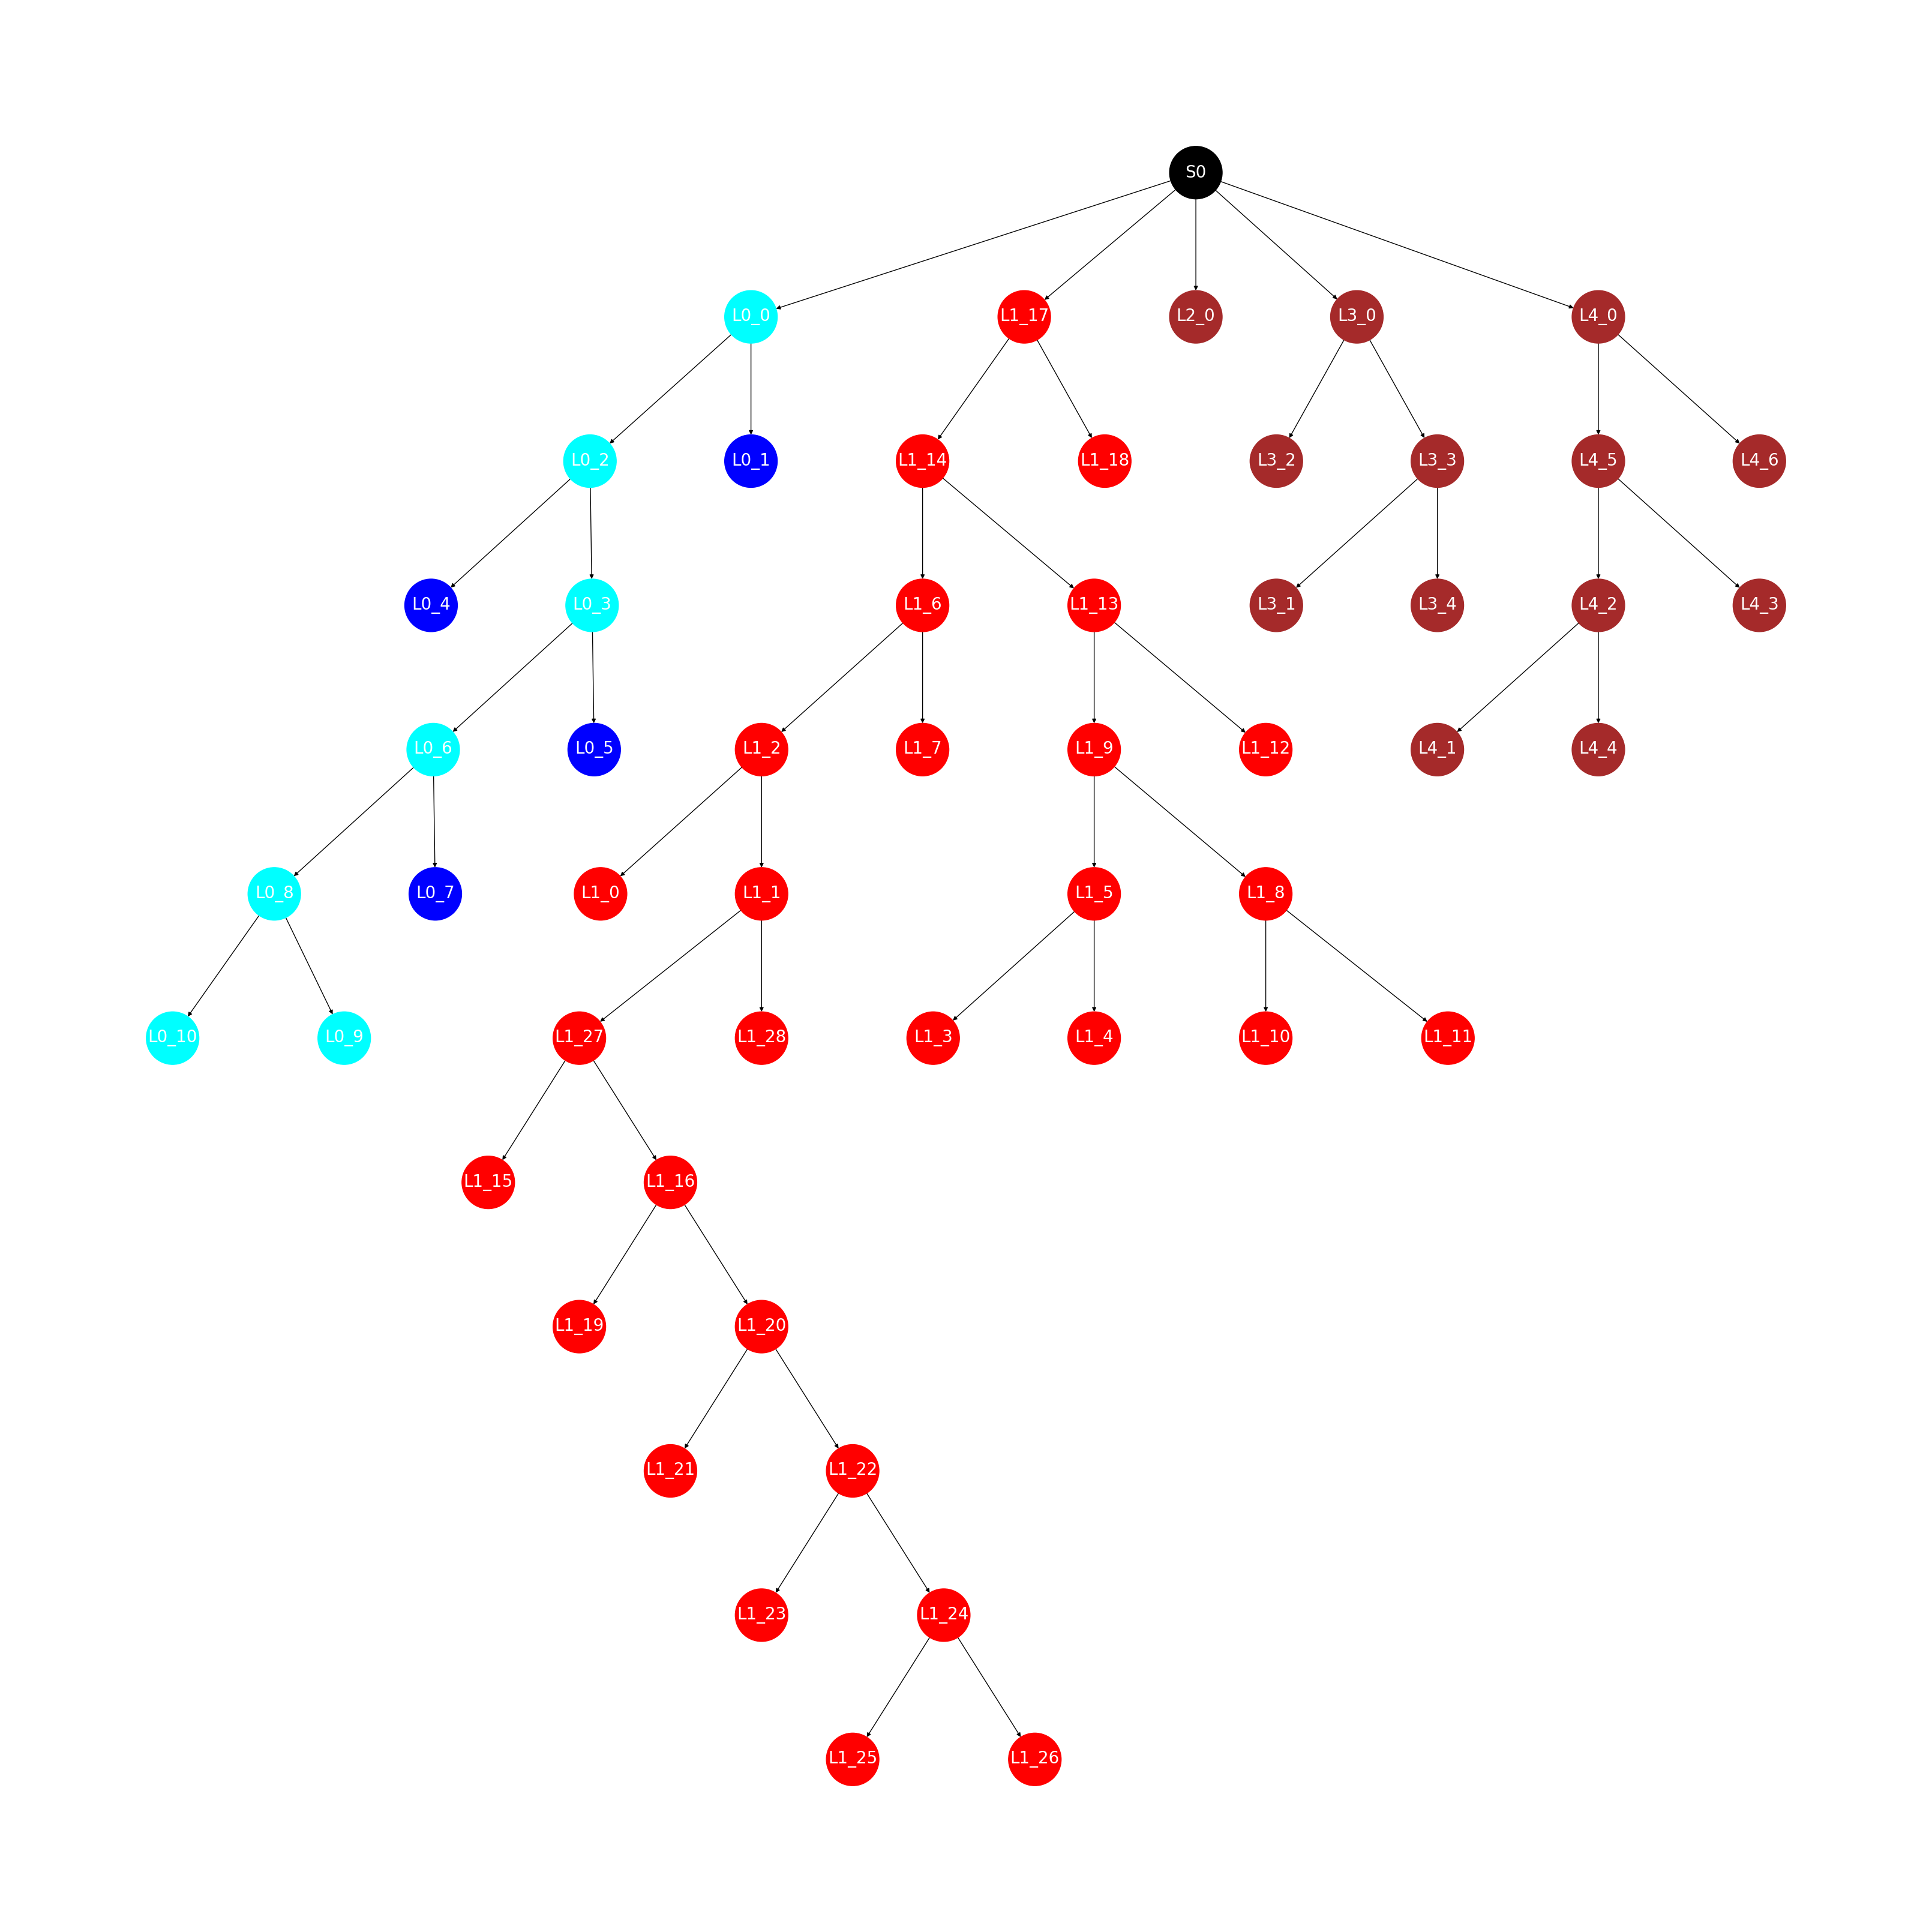

In [21]:
nxu.draw_tree(G)

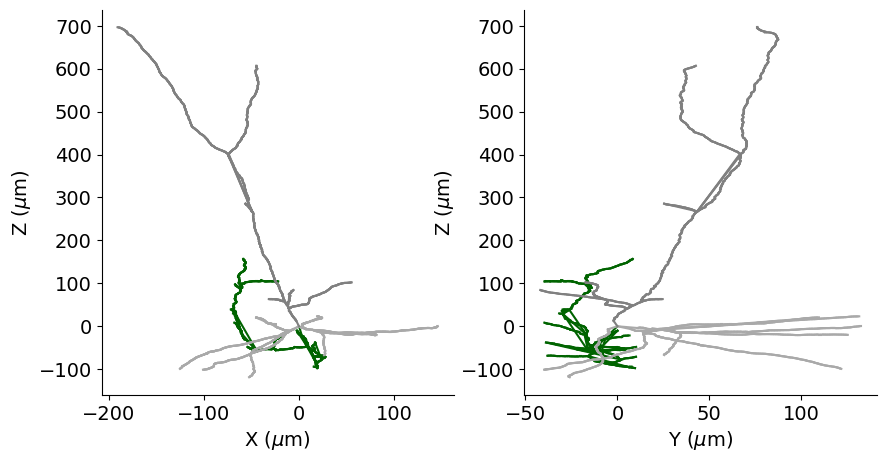

In [22]:
nxu.plot(G)

# Split Points

In [ ]:
vdi.split_locations_df_using_red_blue_suggestions_from_segment